 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path("whale_returns.csv")
whale_df = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()

/var/folders/0y/0ryw5t697kx0w5g519j9r8840000gn/T/ipykernel_18007/3916647766.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Drop nulls
whale_df.isnull().sum()
whale_df.isnull().sum() / len(whale_df) * 100
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [4]:
# Reading algorithmic returns
algo_returns_path = Path("algo_returns.csv")
algo_df = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.head()

/var/folders/0y/0ryw5t697kx0w5g519j9r8840000gn/T/ipykernel_18007/716471373.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [5]:
# Count nulls
algo_df.isnull().sum()
algo_df.isnull().sum() / len(algo_df) * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [6]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [7]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

/var/folders/0y/0ryw5t697kx0w5g519j9r8840000gn/T/ipykernel_18007/3902571622.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df = pd.read_csv(sp500_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
/var/folders/0y/0ryw5t697kx0w5g519j9r8840000gn/T/ipykernel_18007/3902571622.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [8]:
# Check Data Types
sp500_df.dtypes
sp500_df['Close'].apply(type).value_counts()

Close
<class 'str'>    1649
Name: count, dtype: int64

In [9]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace(',','').str.replace('$','').astype('float')
sp500_df.dtypes
sp500_df['Close'].apply(type).value_counts()
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [10]:
# Calculate Daily Returns
sp500_df.sort_index(inplace=True)
sp500_df_returns = sp500_df.pct_change()
sp500_df_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [11]:
# Drop nulls
sp500_df_returns.dropna(inplace=True)
sp500_df_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [12]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df_returns.rename(columns = {'Close':'sp500-pct-change'}, inplace = True)
sp500_df_returns.head()

,sp500-pct-change
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [13]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df,algo_df, sp500_df_returns], axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500-pct-change
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

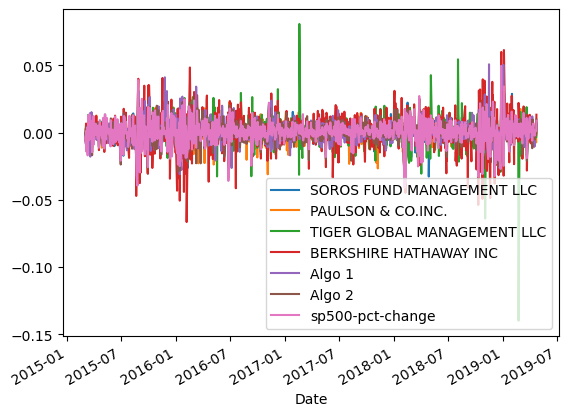

In [14]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

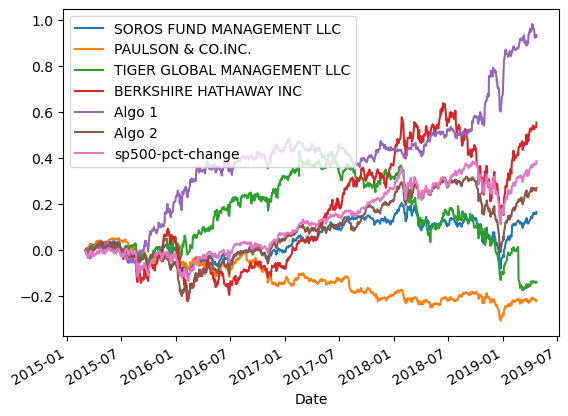

In [15]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

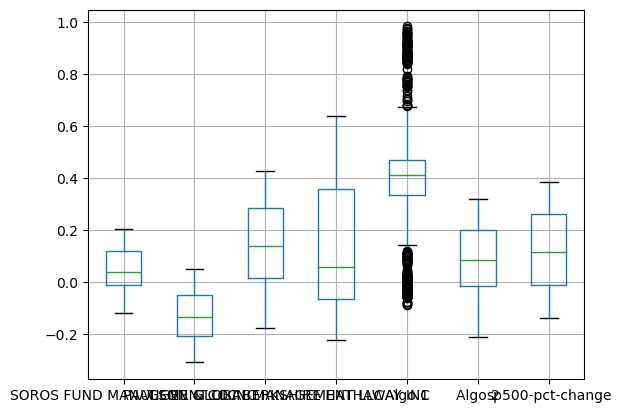

In [16]:
# Box plot to visually show risk
cumulative_returns.boxplot()

### Calculate Standard Deviations

In [17]:
# Calculate the daily standard deviations of all portfolios
volatility = cumulative_returns.std()
volatility.sort_values(inplace=True)
volatility

SOROS FUND MANAGEMENT LLC      0.073238
PAULSON & CO.INC.              0.088455
Algo 2                         0.131700
sp500-pct-change               0.144448
TIGER GLOBAL MANAGEMENT LLC    0.149844
Algo 1                         0.232277
BERKSHIRE HATHAWAY INC         0.241575
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [18]:
# Calculate  the daily standard deviation of S&P 500
stdev_SFM = cumulative_returns['SOROS FUND MANAGEMENT LLC'].std()
stdev_PCI = cumulative_returns['PAULSON & CO.INC. '].std()
stdev_sp500 = cumulative_returns['sp500-pct-change'].std()
stdev_Algo2 = cumulative_returns['Algo 2'].std()
stdev_TGM = cumulative_returns['TIGER GLOBAL MANAGEMENT LLC'].std()
stdev_Algo1 = cumulative_returns['Algo 1'].std()
stdev_BHI = cumulative_returns['BERKSHIRE HATHAWAY INC'].std()

print(stdev_sp500)

# Determine which portfolios are riskier than the S&P 500
print(f"Algo2: {stdev_Algo2} | TGM: {stdev_TGM} | Algo1: {stdev_Algo1} | BHI: {stdev_BHI}")

0.14444769967610394
Algo2: 0.1317003306180718 | TGM: 0.14984442474432122 | Algo1: 0.23227714752452824 | BHI: 0.2415746288005747


### Calculate the Annualized Standard Deviation

In [19]:
# Calculate the annualized standard deviation (252 trading days)
volatility = cumulative_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility


SOROS FUND MANAGEMENT LLC      1.162620
PAULSON & CO.INC.              1.404180
Algo 2                         2.090678
sp500-pct-change               2.293036
TIGER GLOBAL MANAGEMENT LLC    2.378706
Algo 1                         3.687285
BERKSHIRE HATHAWAY INC         3.834878
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

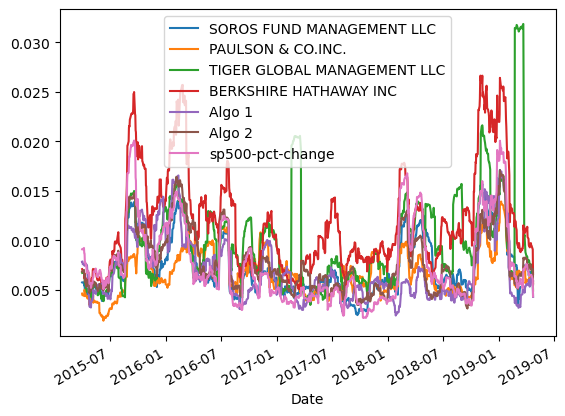

In [20]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df_21_std = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
combined_df_21_std.plot()

### Calculate and plot the correlation

<Axes: >

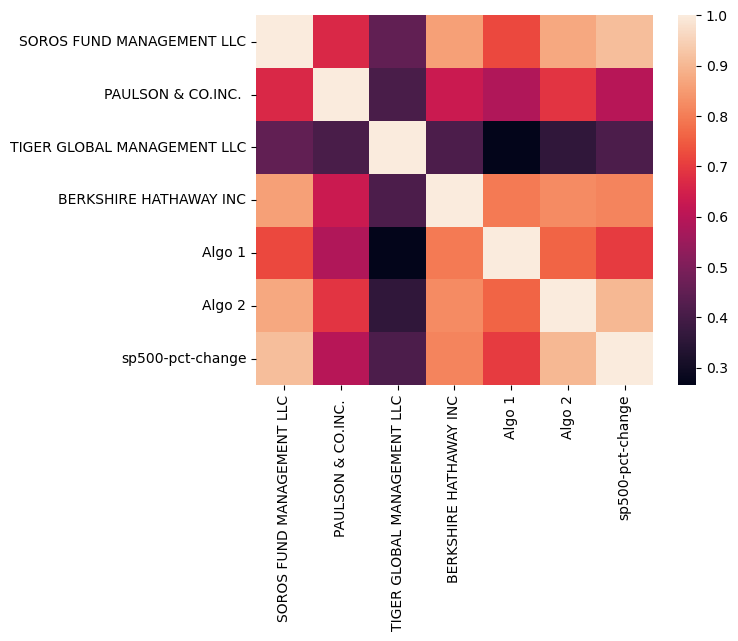

In [21]:
# Calculate the correlation
correlation_combined_df_21_std = combined_df_21_std.corr()

# Display de correlation matrix
sns.heatmap(correlation_combined_df_21_std)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

1.8217749991632744e-05
7.316632424648712e-05
Algo1_beta: 0.24899091459425637


<Axes: title={'center': 'Rolling 21-Day Beta of Algo1'}, xlabel='Date'>

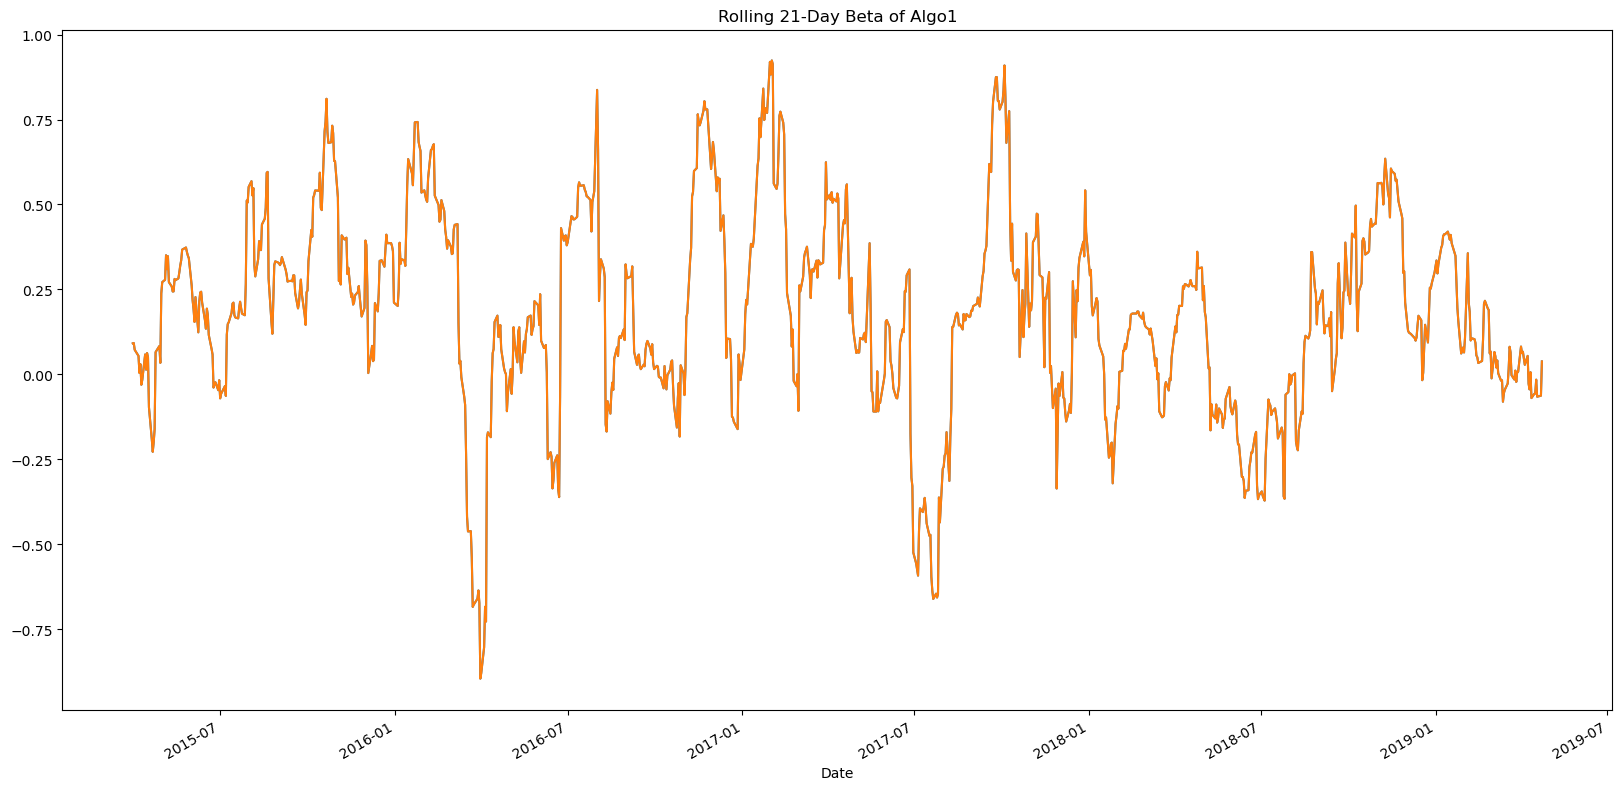

In [22]:
# Calculate covariance of a single portfolio
Algo1_covariance = combined_df['Algo 1'].cov(combined_df['sp500-pct-change'])
print(Algo1_covariance)

# Calculate variance of S&P 500
sp500_variance = combined_df['sp500-pct-change'].var()
print(sp500_variance)

# Computing beta

Algo1_beta = Algo1_covariance/sp500_variance

print(f"Algo1_beta: {Algo1_beta}")

# Plot beta trend
# Calculate 21-day rolling covariance of Algo1 vs. S&P 500 and plot the data
rolling_Algo1_covariance = combined_df['Algo 1'].rolling(window=21).cov(combined_df['sp500-pct-change'])
# Calculate 21-day rolling variance of S&P 500
rolling_sp500_variance = combined_df['sp500-pct-change'].rolling(window=21).var()
# Calculate 21-day rolling beta of Algo1 and plot the data
rolling_Algo1_beta = rolling_Algo1_covariance / rolling_sp500_variance
rolling_Algo1_beta

# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_Algo1_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of Algo1')
rolling_Algo1_beta.plot(ax=ax)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [23]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [24]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500-pct-change               0.648267
dtype: float64

<Axes: >

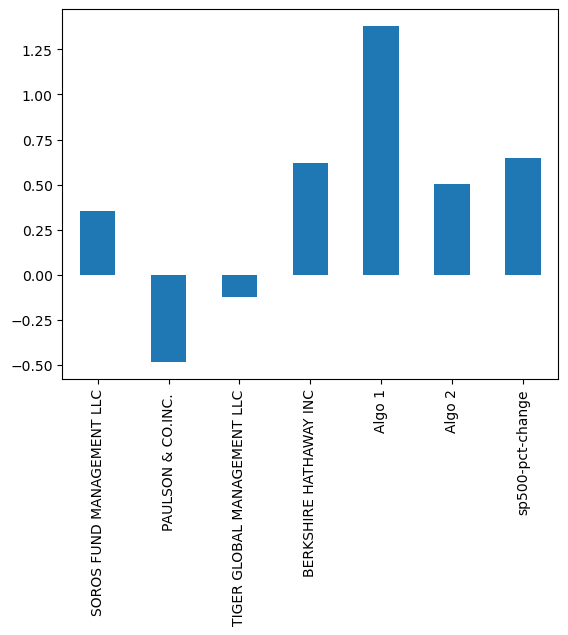

In [25]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo1!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [26]:
# Reading data from 1st stock


In [27]:
# Reading data from 2nd stock


In [28]:
# Reading data from 3rd stock


In [29]:
# Combine all stocks in a single DataFrame
Biotec_returns_path = Path("Biotec.csv")
Biotec_df = pd.read_csv(Biotec_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
Biotec_df.head()

/var/folders/0y/0ryw5t697kx0w5g519j9r8840000gn/T/ipykernel_18007/1895520554.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Biotec_df = pd.read_csv(Biotec_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)


,AMGN,REGN,JNJ,IBB
Date,,,,
2015-01-02,159.89,410.16,104.52,102.11
2015-01-05,157.99,412.47,103.79,101.95
2015-01-06,152.90,396.89,103.28,100.27
2015-01-07,158.24,407.72,105.56,104.00
2015-01-08,157.67,403.25,106.39,104.81


In [30]:
# Reset Date index


In [31]:
# Reorganize portfolio data by having a column per symbol


In [32]:
# Calculate daily returns
Biotec_df.sort_index(inplace=True)
Biotec_df_returns = Biotec_df.pct_change()

# Drop NAs
Biotec_df_returns.dropna(inplace=True)

# Display sample data
Biotec_df_returns.head()

,AMGN,REGN,JNJ,IBB
Date,,,,
2015-01-05,-0.011883,0.005632,-0.006984,-0.001567
2015-01-06,-0.032217,-0.037772,-0.004914,-0.016479
2015-01-07,0.034925,0.027287,0.022076,0.037200
2015-01-08,-0.003602,-0.010963,0.007863,0.007788
2015-01-09,-0.012304,0.019318,-0.013629,-0.003530


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [1/4, 1/4, 1/4, 1/4]

# Calculate portfolio return
Biotec_returns = Biotec_df_returns.dot(weights)

# Display sample data
Biotec_returns.head()

# Calculate portfolio return
cumulative_Biotec_returns = (1 + Biotec_df_returns).cumprod()
cumulative_Biotec_returns.head()

,AMGN,REGN,JNJ,IBB
Date,,,,
2015-01-05,0.988117,1.005632,0.993016,0.998433
2015-01-06,0.956282,0.967647,0.988136,0.981980
2015-01-07,0.989680,0.994051,1.009950,1.018509
2015-01-08,0.986115,0.983153,1.017891,1.026442
2015-01-09,0.973982,1.002146,1.004018,1.022819


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame
Joined_df = pd.concat([combined_df,Biotec_df_returns], axis="columns", join="inner")
Joined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500-pct-change,AMGN,REGN,JNJ,IBB
Date,,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.006703,-0.014172,-0.008525,-0.005386
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.003973,0.001285,-0.006742,0.006392
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.002576,0.038519,0.008559,0.022318
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.029574,-0.015899,-0.023508,-0.015273
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.000839,0.011229,0.005494,0.001490
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.016475,-0.067231,0.010987,-0.009956
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.029673,-0.028078,0.003623,-0.038852
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.027402,0.002070,-0.007219,-0.005707


In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Joined_df.dropna(inplace=True)
Joined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500-pct-change,AMGN,REGN,JNJ,IBB
Date,,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.006703,-0.014172,-0.008525,-0.005386
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.003973,0.001285,-0.006742,0.006392
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.002576,0.038519,0.008559,0.022318
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.029574,-0.015899,-0.023508,-0.015273
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.000839,0.011229,0.005494,0.001490
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.016475,-0.067231,0.010987,-0.009956
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.029673,-0.028078,0.003623,-0.038852
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.027402,0.002070,-0.007219,-0.005707


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`
volatility_2 = Joined_df.std() * np.sqrt(252)
volatility_2.sort_values(inplace=True)
volatility_2

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
sp500-pct-change               0.135786
JNJ                            0.160253
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
AMGN                           0.237354
IBB                            0.252427
REGN                           0.339575
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

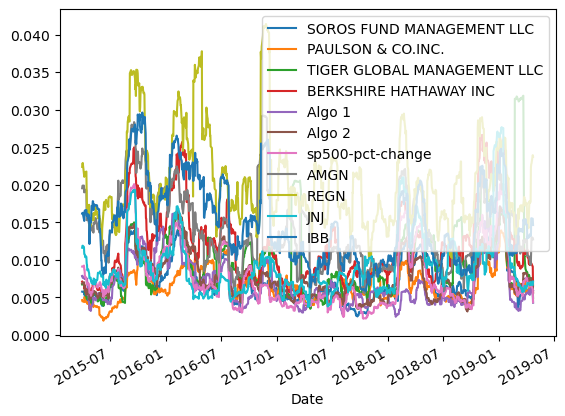

In [37]:
# Calculate rolling standard deviation
Joined_df_21_std = Joined_df.rolling(window=21).std()

# Plot the rolling standard deviation
Joined_df_21_std.plot()


### Calculate and plot the correlation

<Axes: >

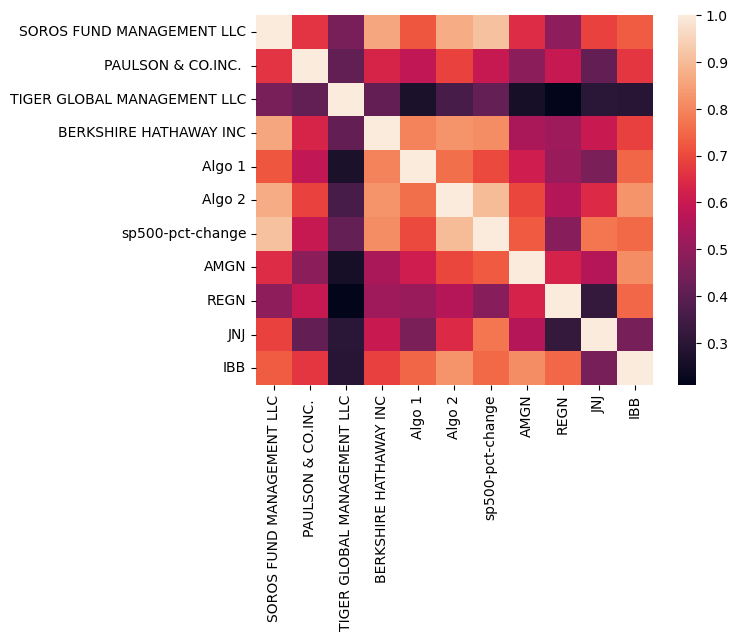

In [38]:
# Calculate and plot the correlation
correlation_Joined_df_21_std = Joined_df_21_std.corr()

# Display de correlation matrix
sns.heatmap(correlation_Joined_df_21_std)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of Algo1'}, xlabel='Date'>

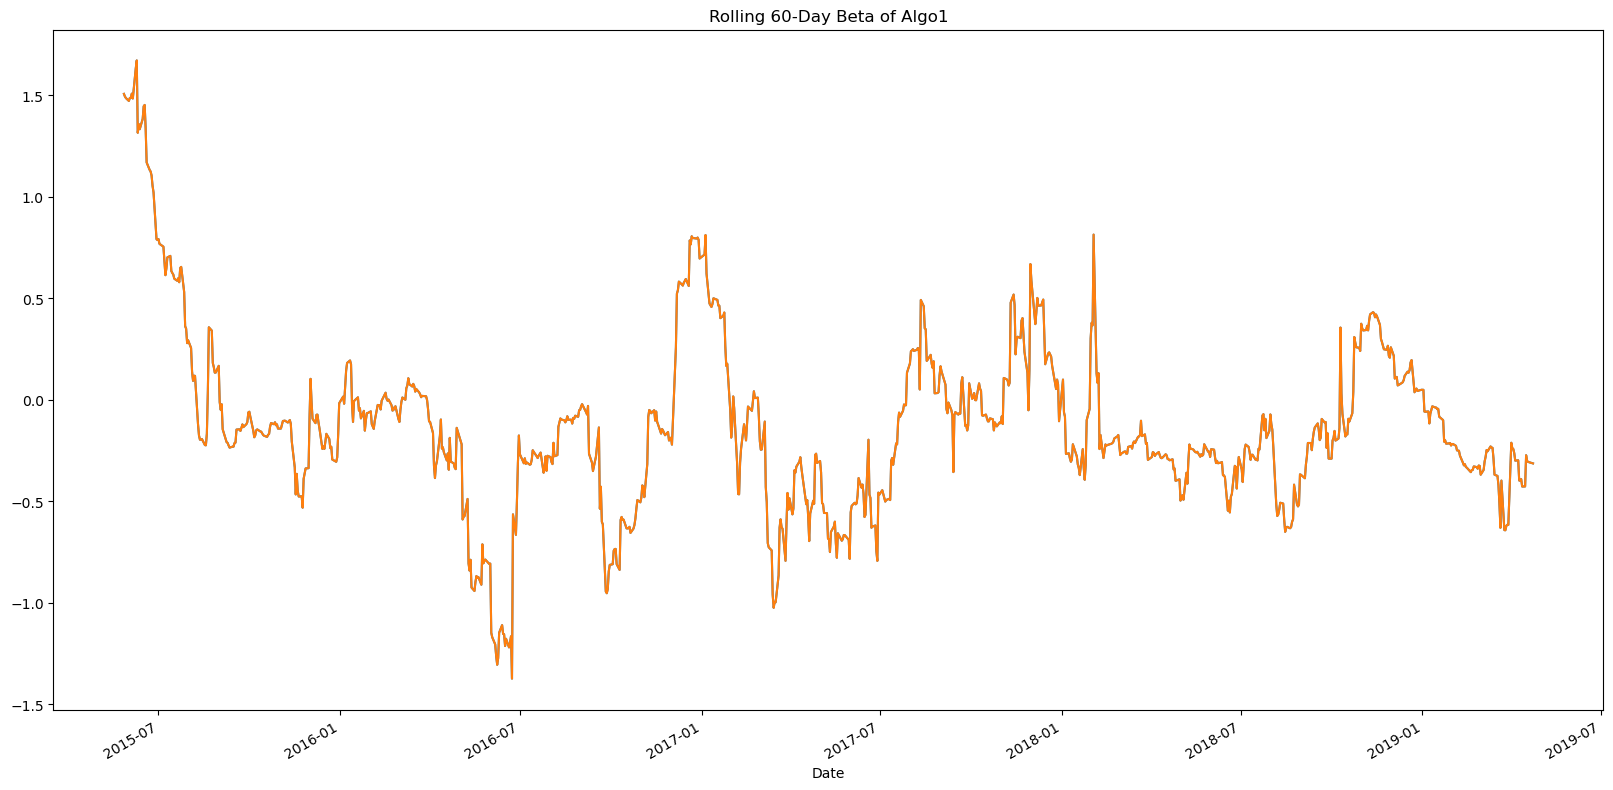

In [39]:
# Calculate 60-day rolling covariance of REGN vs. S&P 500 and plot the data
rolling_REGN_covariance = Joined_df['REGN'].rolling(window=60).cov(Joined_df['sp500-pct-change'])
# Calculate 60-day rolling variance of S&P 500
rolling_sp500_variance = Joined_df['sp500-pct-change'].rolling(window=60).var()
# Calculate 60-day rolling beta of Algo1 and plot the data
rolling_REGN_beta = rolling_REGN_covariance / rolling_sp500_variance
rolling_REGN_beta

# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_REGN_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo1')
rolling_REGN_beta.plot(ax=ax)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_2 = (Joined_df.mean() * 252) / (Joined_df.std() * np.sqrt(252))
sharpe_ratios_2

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500-pct-change               0.648267
AMGN                           0.239793
REGN                           0.021624
JNJ                            0.539176
IBB                            0.070054
dtype: float64

<Axes: >

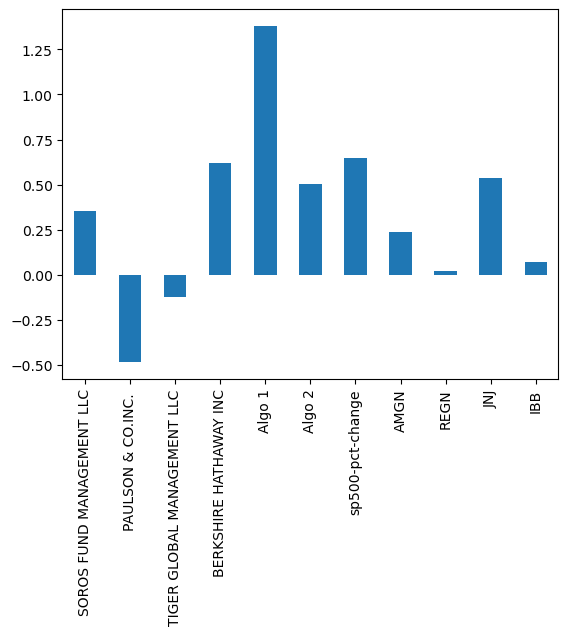

In [41]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot.bar()

### How does your portfolio do?

Write your answer here!

In [44]:
print("JNJ did the best, but not so good for Biotech overall")

JNJ did the best, but not so good for Biotech overall
